# **Algoritmos de optimización - Seminario** <br>
Datos del alumno:
* Nombre y apellidos: Mikel Pérez Frutos  <br>
* Git: https://github.com/mikelinnho/03MIAR---Algoritmos-de-Optimizacion/Seminario <br>
* Colab: https://colab.research.google.com/drive/1fHKUIlHprrIztPO5fdWCi1q3DLZtgXrn?usp=sharing <br>

Problema: <br>
* Organizar los horarios de partidos de La Liga<br>

Descripción del problema: <br>

Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia. 

Los horarios disponibles se conocen a priori y son los siguientes: <br>
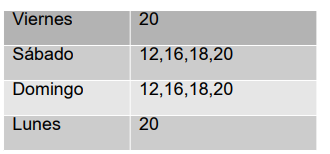

En primer lugar se clasifican los equipos en tres categorías según el numero de 
seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la 
categoría A, 11 equipos de categoría B y 6 equipos de categoría C

Se conoce estadísticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos):

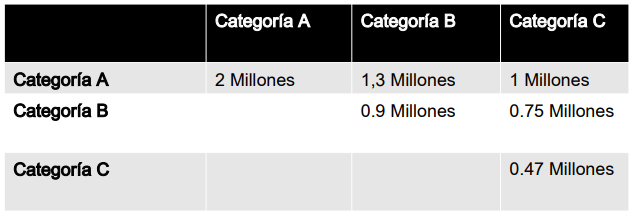

Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla:

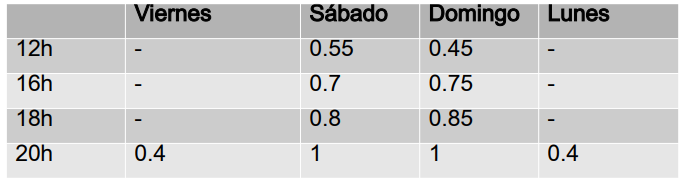

**NOTA:** Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes.

Es posible la coincidencia de horarios pero en este caso la audiencia de cada partido se verá afectada y se estima que se reduce en porcentaje según la 
siguiente tabla dependiendo del número de coincidencias:

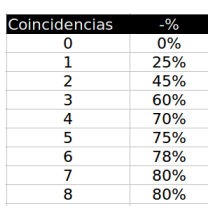


                                        

# **Número de posibilidades** <br>
¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>
¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

En este problema, las restricciones requieren que haya al menos un partido el viernes y otro el lunes. Si no se considera esta restricción y se deben distribuir 10 partidos, entonces todas las combinaciones posibles de 10 valores (0 a 9) se pueden usar como soluciones. El orden de estas combinaciones es importante y se permite la repetición, ya que se pueden tener varios partidos en el mismo día. Esta es una variación con repetición que da un total de 10^10 = 10,000,000,000 posibilidades.

Sin embargo, si se considera la restricción de tener al menos un partido el viernes y otro el lunes, siempre habrá dos valores fijos, el 0 y el 9, y las otras 8 cifras pueden variar. Además, estos dos valores pueden estar en cualquier posición. Usando el principio de inclusión-exclusión, se puede calcular que el número total de combinaciones de listas de 10 elementos que contienen 0 y 9 al menos una vez, donde importa el orden y se permite la repetición, es de 4,100,173,022.

> **Total = 10^10 - 2*9^10 + 8^10 = 4,100,173,022**

Donde:
* Si una lista decimal no tiene ningún 9, entonces tendríamos 9 elecciones para cada posición. Por tanto, habría 9^10 combinaciones que no tienen ningún 0 y 9^10 combinaciones en las que no hay ningún 9.
* Si se eliminan 2*9^10 combinaciones, se están restando elementos que no tienen 0 o 9 dos veces. Si faltan los elementos 0 y 9 entonces se tienen 8 elecciones para cada posición, por lo que serían 8^10 combinaciones que no contienen ni 0 ni 9.

#**Datos del modelo** <br>
Según el modelo para el espacio de soluciones:

**¿Cuál es la función objetivo? <br>**
La función objetivo de un algoritmo es una medida matemática que se utiliza para evaluar el desempeño de un algoritmo en un problema específico. Esta función representa el objetivo que se busca alcanzar mediante el algoritmo, y puede ser definida de diferentes maneras dependiendo del problema.

En términos generales, la función objetivo se define en función de las variables de entrada y salida del algoritmo. Por ejemplo, en un problema de optimización, la función objetivo puede ser la minimización o maximización de una determinada función matemática, mientras que en un problema de clasificación, la función objetivo puede ser la precisión de las predicciones del modelo.

En el caso elegido, se trata de encontrar la combinación de partidos y franjas horarias que supongan el aforo posible como resultado de sumar el aforo de todos los partidos de forma individual.


**¿Es un problema de maximización o minimización? <br>**
Como se ha citado en el apartado anterior, se trata de un problema en el que se desea conseguir el mayor aforo total posible para unos partidos y unas franjas horarias dadas. Es por esto que se trata de un problema de maximización. 

Un problema de maximización típicamente se representa mediante una función objetivo que se desea maximizar y un conjunto de restricciones que limitan las posibles soluciones, que para el problema que he seleccionado son las siguientes:
- Siempre ha de haber un partido el viernes.
- Siempre ha de haber un partido el lunes.

# **Estructura de datos** <br>
¿Cual es la estructura de datos que mejor se adapta al problema? 

Mi principal duda estuvo entre usar diccionarios o arrays (o listas); pero al final me decanté por los diccionarios por lo siguiente: 

* La búsqueda es más eficiente en grandes conjuntos de datos ya que  internamente se implementan mediante una tabla hash, lo que significa que la búsqueda de un valor asociado a una clave específica es muy rápida.

* Los diccionarios son más fáciles de usar y manipular en Python. La sintaxis para acceder a los elementos de un diccionario es simple y legible, y los métodos incorporados para agregar, actualizar y eliminar elementos son más intuitivos.

* Los diccionarios son ideales para almacenar y manipular datos que están asociados en pares clave-valor. Esto hace que sea fácil realizar operaciones que requieren la combinación de datos relacionados, y me ha sido util para clasificar la información acerca de los factores de corrección del aforo.


# **Fuerza bruta**
Diseña un algoritmo para resolver el problema por fuerza bruta:

Includes:

In [22]:
import itertools as itertools
from copy import deepcopy
import pprint

Las funciones de generación de las posibles combinaciones serían:

In [23]:
def eliminarCombinaciones(combinaciones, partidos):
    copiaCombinaciones = deepcopy(combinaciones)
    for partido in partidos:
        for combinacion in combinaciones:
            for partidoCombinacion in combinacion:
                if partido == partidoCombinacion:
                    if combinacion in copiaCombinaciones:
                        copiaCombinaciones.remove(combinacion)
    return copiaCombinaciones
  
def crearSoluciones(combinacionesFranjas, franjasHorarias):
    soluciones = []
    if len(franjasHorarias) == 1:
        for combinacion in combinacionesFranjas:
            diccionario = {franjasHorarias[0]: combinacion}
            soluciones.append(diccionario)
        return soluciones
    for franja in franjasHorarias:
        restoFranjas = deepcopy(franjasHorarias)
        restoFranjas.remove(franja)
        for combinacion in combinacionesFranjas:
            restoCombinaciones = deepcopy(combinacionesFranjas)
            restoCombinaciones = eliminarCombinaciones(restoCombinaciones, combinacion)
            if restoCombinaciones == []:
                soluciones.append({franja: combinacion})
            else:
                solucionesParciales = crearSoluciones(restoCombinaciones, restoFranjas)
                for solucionParcial in solucionesParciales:
                    solucionParcial[franja] = combinacion
                    if solucionParcial not in soluciones:
                        soluciones.append(solucionParcial)

    return soluciones     

Y para ayudar a generar los datos de entrada:

In [24]:
def crearCombinacionesPartidos(partidos):
    listaOpciones = []
    for i in range(1, len(partidos) + 1):
        combinaciones = list(itertools.combinations(partidos, i))
        for combinacion in combinaciones:
            listaOpciones.append(combinacion)

    return listaOpciones

Por ejemplo:

In [30]:
p = [str(x) for x in range(1, 4)]
combinaciones = crearCombinacionesPartidos(p)
pp = pprint.PrettyPrinter()
pp.pprint(combinaciones)

[('1',), ('2',), ('3',), ('1', '2'), ('1', '3'), ('2', '3'), ('1', '2', '3')]


Con partidos, sería (he reducido el número de partidos a 3 para que sea legible):

In [31]:
partidos = [
    ["Celta", "Real Madrid"],
    ["Valencia", "R. Sociedad"],
    ["Mallorca", "Eibar"]
]
combinaciones = crearCombinacionesPartidos(partidos)
pp = pprint.PrettyPrinter()
pp.pprint(combinaciones)

[(['Celta', 'Real Madrid'],),
 (['Valencia', 'R. Sociedad'],),
 (['Mallorca', 'Eibar'],),
 (['Celta', 'Real Madrid'], ['Valencia', 'R. Sociedad']),
 (['Celta', 'Real Madrid'], ['Mallorca', 'Eibar']),
 (['Valencia', 'R. Sociedad'], ['Mallorca', 'Eibar']),
 (['Celta', 'Real Madrid'], ['Valencia', 'R. Sociedad'], ['Mallorca', 'Eibar'])]


Todas las posibles combinaciones para una jornada reducida y unos horarios reducidos:

In [38]:
p = [str(x) for x in range(1, 5)] #Cuatro partidos
combinaciones = crearCombinacionesPartidos(p) 
franjasHorarias = ["V20", "S20", "D20", "L20"] #Cuatro franjas horarias
soluciones = crearSoluciones(combinaciones, franjasHorarias)
pp = pprint.PrettyPrinter()
pp.pprint(soluciones)

[{'D20': ('3',), 'L20': ('4',), 'S20': ('2',), 'V20': ('1',)},
 {'D20': ('4',), 'L20': ('3',), 'S20': ('2',), 'V20': ('1',)},
 {'D20': ('3', '4'), 'S20': ('2',), 'V20': ('1',)},
 {'L20': ('3', '4'), 'S20': ('2',), 'V20': ('1',)},
 {'D20': ('2',), 'L20': ('4',), 'S20': ('3',), 'V20': ('1',)},
 {'D20': ('4',), 'L20': ('2',), 'S20': ('3',), 'V20': ('1',)},
 {'D20': ('2', '4'), 'S20': ('3',), 'V20': ('1',)},
 {'L20': ('2', '4'), 'S20': ('3',), 'V20': ('1',)},
 {'D20': ('2',), 'L20': ('3',), 'S20': ('4',), 'V20': ('1',)},
 {'D20': ('3',), 'L20': ('2',), 'S20': ('4',), 'V20': ('1',)},
 {'D20': ('2', '3'), 'S20': ('4',), 'V20': ('1',)},
 {'L20': ('2', '3'), 'S20': ('4',), 'V20': ('1',)},
 {'D20': ('4',), 'S20': ('2', '3'), 'V20': ('1',)},
 {'L20': ('4',), 'S20': ('2', '3'), 'V20': ('1',)},
 {'D20': ('3',), 'S20': ('2', '4'), 'V20': ('1',)},
 {'L20': ('3',), 'S20': ('2', '4'), 'V20': ('1',)},
 {'D20': ('2',), 'S20': ('3', '4'), 'V20': ('1',)},
 {'L20': ('2',), 'S20': ('3', '4'), 'V20': ('1',)}

Esta combinación ya supone el número posible de soluciones:

In [39]:
print(len(soluciones))

256


Para el caso real:

In [ ]:
partidos = [
    ["Celta", "Real Madrid"],
    ["Valencia", "R. Sociedad"],
    ["Mallorca", "Eibar"],
    ["Athletic", "Barcelona"],
    ["Leganés", "Osasuna"],
    ["Villareal", "Granada"],
    ["Alavés", "Levante"],
    ["Espanyol", "Sevilla"],
    ["Betis", "Valladolid"],
    ["Atlético Madrid", "Getafe"]
]
franjasHorarias = ["V20", "S12", "S16", "S18", "S20", "D12", "D16", "D18", "D20", "L20"]
combinaciones = crearCombinacionesPartidos(partidos) 
soluciones = crearSoluciones(combinaciones, franjasHorarias)
print(len(soluciones))

Al ver la dificultad del algoritmo de generación de jornadas, he decidido no continuar con el cálculo del aforo para cada una de las jornadas.

# **Complejidad del algoritmo de fuerza bruta** <br>
Calcular la complejidad del algoritmo:

La complejidad de este algoritmo depende de la cantidad de combinaciones y partidos que se ingresen, así como de la cantidad de franjas horarias disponibles. La función "**eliminarCombinaciones**" tiene una complejidad de O(n^2), ya que tiene dos bucles anidados que recorren cada partido y combinación de la lista. La función "**crearSoluciones**" tiene un bucle anidado que recorre cada franja y combinación de la lista, por lo que su complejidad es O(n^3), donde n es la cantidad de franjas horarias disponibles.

En general, la complejidad de este algoritmo es exponencial en el peor de los casos, ya que cada vez que se añade una franja horaria se multiplican las combinaciones posibles. Por lo tanto, su eficiencia disminuye rápidamente a medida que aumenta el número de franjas y combinaciones, lo que limita su capacidad para manejar conjuntos grandes de datos.

# **Búsqueda aleatoria**
Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta:

Includes:

In [1]:
from copy import deepcopy
import itertools as itertools
import random as random
import json
import pprint

## **1. Datos de partida** <br>
Los datos serían los siguientes:

#### **1.1. Jornada de partida** <br>
Definimos una combinación de partidos de entrada:

In [2]:
partidos = [
    ["Celta", "Real Madrid"],       #0 
    ["Valencia", "Real Sociedad"],  #1
    ["Mallorca", "Eibar"],          #2
    ["Athletic", "Barcelona"],      #3
    ["Leganés", "Osasuna"],         #4
    ["Villareal", "Granada"],       #5
    ["Alavés", "Levante"],          #6
    ["Espanyol", "Sevilla"],        #7
    ["Betis", "Valladolid"],        #8
    ["Atlético Madrid", "Getafe"]   #9
]

#### **1.2. Franjas horarias** <br>
Estas serían las franjas en las que se pueden disputar los partidos, para las cuales el viernes a las 20:00 y el lunes a las 20:00 siempre tienen que tener como mínimo un partido asignado.

In [3]:
franjasHorarias = ["V20", "S12", "S16", "S18", "S20", "D12", "D16", "D18", "D20", "L20"]

#### **1.3. Clasificación de los equipos por el número de seguidores** <br>
Se clasifican los equipos en tres categorías según el numero de seguidores (que tiene relación directa con la audiencia). Hay 3 equipos en la 
categoría A, 11 equipos de categoría B y 6 equipos de categoría C.

In [4]:
categoriasEquipos = {
    "A": ["Real Madrid", "Real Sociedad", "Barcelona"],
    "B": ["Celta", "Valencia", "Athletic", "Villareal", "Alavés",
        "Levante", "Espanyol", "Sevilla", "Betis", "Atlético Madrid", "Getafe"],
    "C": ["Mallorca", "Eibar", "Leganés", "Osasuna", "Granada", "Valladolid"]
}

Crearemos una función que dado el nombre de un equipo nos devuelva la categoría. Para facilitar el uso de la función a posteriori, devolverá 0 si es de la categoría A, 1 si es de la categoría B y 2 si es de la categoría C para que corresponda con la fila y la columna de la matriz de aforos.

In [5]:
def calcularCategoriaEquipo(equipo, categoriasEquipos):
    if equipo in categoriasEquipos["A"]: return 0
    elif equipo in categoriasEquipos["B"]: return 1
    elif equipo in categoriasEquipos["C"]: return 2
    else: return None

Por ejemplo, la categoría del "Celta" sería:

In [6]:
categoria = calcularCategoriaEquipo("Celta", categoriasEquipos)
print("A" if categoria == 0 else ("B" if categoria == 1 else "C"))

B


#### **1.4. Matriz de seguidores por partido** <br>
Se conoce estadísticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos).

In [7]:
matrizAforos = [[2.0, 1.3, 1.0], [1.3, 0.9, 0.75], [1.0, 0.75, 0.47]]

Crearemos una función que dada la categoría de los equipos que juegan el partido, devuelva el número de seguidores que van a ver el partido si este fuera a las 20:00.

In [8]:
def calcularAforoPartido(equipoLocal, equipoVisitante, matrizAforos):
    return matrizAforos[equipoLocal][equipoVisitante]

Por ejemplo, para el partido "Celta - Real Madrid":

In [9]:
aforo = calcularAforoPartido(calcularCategoriaEquipo("Celta", categoriasEquipos), calcularCategoriaEquipo("Real Madrid", categoriasEquipos), matrizAforos)
print(aforo)

1.3


#### **1.5. Coeficientes para partidos en la misma franja horaria** <br>
Es posible la coincidencia de horarios pero en este caso, la audiencia de cada partido se verá afectada y se estima que se reduce en porcentaje según la siguiente tabla dependiendo del número de coincidencias:

In [10]:
coeficientesPartidosCoincidentes = {
    "0": 1,
    "1": 0.75,
    "2": 0.55,
    "3": 0.4,
    "4": 0.3,
    "5": 0.25,
    "6": 0.22,
    "7": 0.2,
    "8": 0.2
}

#### **1.6. Coeficientes para las franjas horarias** <br>
Si el horario del partido no se realiza a las 20:00 se sabe que se reduce según los coeficientes de la siguiente tabla

In [11]:
coeficientesFranjasHorarias = {
    "V20": 0.4,
    "S12": 0.55,
    "S16": 0.7,
    "S18": 0.8,
    "S20": 1,
    "D12": 0.45,
    "D16": 0.75,
    "D18": 0.85,
    "D20": 1,
    "L20": 0.4
}

## **2. Algoritmos** <br>
Los algoritmos de búsqueda serían los siguientes:

#### **2.1. Generador de una jornada aleatoriamente** <br>
Generar una jornada de forma aleatoria:

In [12]:
def calcularCategoriaEquipo(equipo, categoriasEquipos):
    if equipo in categoriasEquipos["A"]: return 0
    elif equipo in categoriasEquipos["B"]: return 1
    elif equipo in categoriasEquipos["C"]: return 2
    else: return None

def calcularAforoPartido(equipoLocal, equipoVisitante, matrizAforos):
    return matrizAforos[equipoLocal][equipoVisitante]

def generadorHorarioAleatorio(partidos, franjasHorarias, categoriasEquipos, matrizAforos, coeficientesFranjasHorarias, coeficientesPartidosCoincidentes):
    random.shuffle(partidos)
    dicJornada = {}
    dicAforoFranjas = {}
    
    #Minimo un partido en "V20":
    partido = partidos[0]
    dicJornada["V20"] = {"Partidos": [partido]}
    aforo = calcularAforoPartido(
                calcularCategoriaEquipo(partido[0], categoriasEquipos), 
                calcularCategoriaEquipo(partido[1], categoriasEquipos), 
                matrizAforos)
    dicAforoFranjas["V20"] = aforo

    #Minimo un partido en "L20":
    partido = partidos[1]
    dicJornada["L20"] = {"Partidos": [partido]}
    aforo = calcularAforoPartido(
                calcularCategoriaEquipo(partido[0], categoriasEquipos), 
                calcularCategoriaEquipo(partido[1], categoriasEquipos), 
                matrizAforos)
    dicAforoFranjas["L20"] = aforo

    for partido in partidos[2:]:
        franjaAleatoria = franjasHorarias[random.randint(0, len(franjasHorarias) - 1)]
        aforo = calcularAforoPartido(
                calcularCategoriaEquipo(partido[0], categoriasEquipos), 
                calcularCategoriaEquipo(partido[1], categoriasEquipos), 
                matrizAforos)
        
        if franjaAleatoria in dicJornada:
            dicJornada[franjaAleatoria]["Partidos"].append(partido)
            dicAforoFranjas[franjaAleatoria] += aforo
        else:
            dicJornada[franjaAleatoria] = {"Partidos": [partido]}
            dicAforoFranjas[franjaAleatoria] = aforo
    
    for franja in dicJornada:
        dicJornada[franja]["Partidos"] = list(sorted(dicJornada[franja]["Partidos"]))
        numeroPartidos = len(dicJornada[franja]["Partidos"])
        dicJornada[franja]["coeficienteJornada"] = coeficientesFranjasHorarias[franja]
        dicJornada[franja]["coeficienteNumeroPartidos"] = coeficientesPartidosCoincidentes[str(numeroPartidos - 1)]
        dicJornada[franja]["aforoTotal"] = dicAforoFranjas[franja]
        dicJornada[franja]["aforoTotalConCoeficientes"] = dicJornada[franja]["aforoTotal"] * dicJornada[franja]["coeficienteNumeroPartidos"] * dicJornada[franja]["coeficienteJornada"]

    return dict(sorted(dicJornada.items()))

Por ejemplo, vamos a generar una jornada aleatoria:

In [13]:
jornada = generadorHorarioAleatorio(partidos, franjasHorarias, categoriasEquipos, matrizAforos, coeficientesFranjasHorarias, coeficientesPartidosCoincidentes)
pp = pprint.PrettyPrinter()
pp.pprint(jornada)

{'D16': {'Partidos': [['Espanyol', 'Sevilla']],
         'aforoTotal': 0.9,
         'aforoTotalConCoeficientes': 0.675,
         'coeficienteJornada': 0.75,
         'coeficienteNumeroPartidos': 1},
 'D20': {'Partidos': [['Athletic', 'Barcelona']],
         'aforoTotal': 1.3,
         'aforoTotalConCoeficientes': 1.3,
         'coeficienteJornada': 1,
         'coeficienteNumeroPartidos': 1},
 'L20': {'Partidos': [['Leganés', 'Osasuna']],
         'aforoTotal': 0.47,
         'aforoTotalConCoeficientes': 0.188,
         'coeficienteJornada': 0.4,
         'coeficienteNumeroPartidos': 1},
 'S16': {'Partidos': [['Mallorca', 'Eibar'], ['Valencia', 'Real Sociedad']],
         'aforoTotal': 1.77,
         'aforoTotalConCoeficientes': 0.92925,
         'coeficienteJornada': 0.7,
         'coeficienteNumeroPartidos': 0.75},
 'S18': {'Partidos': [['Villareal', 'Granada']],
         'aforoTotal': 0.75,
         'aforoTotalConCoeficientes': 0.6000000000000001,
         'coeficienteJornada': 0.8

#### **2.2. Calculadora del número de seguidores para una franja horaria** <br>
Calcular el número de seguidores para una franja horaria dada.

In [14]:
def calcularSeguidoresJornada(jornada):
    numeroSeguidores = 0
    for franja in jornada:
        numeroSeguidores += jornada[franja]["aforoTotalConCoeficientes"]
    return numeroSeguidores

Por ejemplo, para la jornada aleatoria que venimos usando:

In [15]:
aforo = calcularSeguidoresJornada(jornada)
print(aforo)

5.241250000000001


#### **2.3. Algoritmo para la búsqueda aleatoria** <br>
Definimos el algoritmo de búsqueda aleatoria que buscará en N iteraciones la combinación de partidos que genera el mayor aforo.

In [16]:
def busqueda_aleatoria(partidos, franjasHorarias, coeficientesPartidosCoincidentes, coeficientesFranjasHorarias, matrizAforos, categoriasEquipos, N):
  #Definición: Calcula la menor distancia para una trayectoria.
  #Parámetros:
  # - partidos: Array de arrays con los enfrentamientos de la jornada.
  # - franjasHorarias: Array con las franjas horarias disponibles en fin de semana.
  # - N es el numero de iteraciones
  #Return: Resultado de la búsqueda aleatoria

  mejorSolucion = {}
  mejorAforo = 0 #Inicializamos con un valor bajo
  
  for i in range(N): #Criterio de parada: repetir N veces pero podemos incluir otros
    jornada = generadorHorarioAleatorio(partidos, franjasHorarias, categoriasEquipos, matrizAforos, coeficientesFranjasHorarias, coeficientesPartidosCoincidentes) #Genera una solucion aleatoria
    aforo = calcularSeguidoresJornada(jornada) #Calcula el valor objetivo(aforo total)  
    if aforo > mejorAforo: #Compara con la mejor obtenida hasta ahora
      mejorSolucion = jornada
      mejorAforo = aforo
  
  print("Mejor solución:") 
  pp = pprint.PrettyPrinter()
  pp.pprint(mejorSolucion)
  print("Aforo:", mejorAforo) 
  return mejorSolucion, mejorAforo

Donde para 1000 iteraciones:

In [17]:
mejorSolucion, mejorAforo = busqueda_aleatoria(partidos, franjasHorarias, coeficientesPartidosCoincidentes, coeficientesFranjasHorarias, matrizAforos, categoriasEquipos, 1000)

Mejor solución:
{'D16': {'Partidos': [['Athletic', 'Barcelona']],
         'aforoTotal': 1.3,
         'aforoTotalConCoeficientes': 0.9750000000000001,
         'coeficienteJornada': 0.75,
         'coeficienteNumeroPartidos': 1},
 'D18': {'Partidos': [['Leganés', 'Osasuna']],
         'aforoTotal': 0.47,
         'aforoTotalConCoeficientes': 0.39949999999999997,
         'coeficienteJornada': 0.85,
         'coeficienteNumeroPartidos': 1},
 'D20': {'Partidos': [['Valencia', 'Real Sociedad']],
         'aforoTotal': 1.3,
         'aforoTotalConCoeficientes': 1.3,
         'coeficienteJornada': 1,
         'coeficienteNumeroPartidos': 1},
 'L20': {'Partidos': [['Villareal', 'Granada']],
         'aforoTotal': 0.75,
         'aforoTotalConCoeficientes': 0.30000000000000004,
         'coeficienteJornada': 0.4,
         'coeficienteNumeroPartidos': 1},
 'S12': {'Partidos': [['Mallorca', 'Eibar']],
         'aforoTotal': 0.47,
         'aforoTotalConCoeficientes': 0.2585,
         'coeficie

# **Fuerza bruta vs búsqueda aleatoria** <br>

Tanto el algoritmo de fuerza bruta como el de búsqueda aleatoria son técnicas utilizadas para resolver problemas en ciencias de la computación, aunque tienen enfoques muy diferentes. <br>

El algoritmo de fuerza bruta: <br>

> Es una técnica exhaustiva que consiste en probar todas las posibles soluciones a un problema, hasta encontrar la solución óptima. Es decir, éste prueba todas las combinaciones posibles de entrada para obtener una respuesta correcta. Aunque este método garantiza que se encontrará la solución óptima, es muy costoso computacionalmente y puede tomar mucho tiempo, especialmente para problemas con muchas variables.

El algoritmo de búsqueda aleatoria: <br>

> Es una técnica que implica la exploración aleatoria del espacio de soluciones. En vez de probar todas las posibles soluciones, éste genera soluciones aleatorias y las evalúa para ver si son una buena solución. Este enfoque es mucho más rápido que el de fuerza bruta, pero no garantiza encontrar la solución óptima.

En general, el algoritmo de fuerza bruta es más preciso pero mucho más lento que la búsqueda aleatoria. En contraste, la búsqueda aleatoria puede ser más rápida pero menos precisa que la fuerza bruta. La elección entre estos dos enfoques depende del problema que se está tratando de resolver y de los recursos disponibles. Si se dispone de mucho tiempo y recursos, la fuerza bruta puede ser la mejor opción para garantizar la precisión. Si se necesita una solución rápida y aproximada, la búsqueda aleatoria puede ser más efectiva.

# **Complejidad del algoritmo de búsqueda aleatoria** <br>
Calcular la complejidad del algoritmo:

La complejidad de este algoritmo se puede dividir en tres partes: 
* La función calcularCategoriaEquipo.
* La función calcularAforoPartido.
* La función generadorHorarioAleatorio.

La función **calcularCategoriaEquipo** tiene una complejidad de tiempo O(1), ya que solo realiza operaciones de acceso a elementos de una lista o diccionario, lo que se puede hacer en tiempo constante.

La función **calcularAforoPartido** tiene una complejidad de tiempo O(1), ya que simplemente accede a un elemento de la matriz de aforos.

La función **generadorHorarioAleatorio** tiene una complejidad de tiempo más compleja, ya que realiza varias operaciones en un bucle while:

* Se mezclan los elementos de la lista para generar más aleatoriedad en la búsqueda de una posible solución o(n).
* Se definen las variables *dicJornada* y *dicAforoFranjas*, y se les asigna un valor vacio que sería 2o(1).
* Luego, para las dos primeras posiciones se realiza lo siguiente:
  1. Una operación o(1) para obtener el elemento de *partidos*. <br>
  2. Una operación o(1) para crear el key en el diccionario *dicJornada* con el *partido* obtenido de *partidosRestantes*. <br>
  3. De la función **calcularCategoriaEquipo** tenemos una operación o(1), que se ejecuta dos veces, por tanto 2o(1), además de la operación o(1) de la función **calcularAforoPartido**, y por último la asignación del resultado a la variable *aforo*, que se trata de una operación o(1). En total, 4o(1). <br>
  4. Una operación o(1) para asignar la variable *aforo* al diccionario *dicAforoFranjas*. <br>

Después, en un bucle for que se ejecuta n-2 veces:
* Se realiza una operación de orden O(1) para generar un número aleatorio.
* Se realiza una operación de orden O(1) para asignar a la variable *franjaAleatoria* la posición generada aleatoriamente en el paso anterior.
* De la función **calcularCategoriaEquipo** tenemos una operación o(1), que se ejecuta dos veces, por tanto 2o(1), además de la operación o(1) de la función **calcularAforoPartido**, y por último la asignación del resultado a la variable *aforo*, que se trata de una operación o(1). En total, 4o(1).
* Tanto en el if como en el else:
  1. Una operación de creación de una nueva franja horaria o de adición al array de "Partidos" una franja horaria de un nuevo partido de orden o(1) en el diccionario de *dicJornada*.
  2. Una operación de creación o actualización de orden o(1) del valor del diccionario *dicAforoFranjas*.

Por último, en el último bucle for que se ejecuta k (número de keys en el diccionario de la jornada) donde se realizan operaciónes de asignación y búsqueda con un total de 13o(1), además de la complejidad del bucle que será o(k).

De forma más general:

> La primera línea del algoritmo random.shuffle(partidos) tiene una complejidad de O(n), donde n es el número de elementos en la lista *partidos*.

> Las siguientes líneas del algoritmo son bucles for y operaciones elementales como asignaciones, adiciones y accesos a diccionarios, que tienen complejidad constante O(1) para cada iteración del bucle. Por lo tanto, estas operaciones tienen una complejidad total de O(m), donde m (n-2) es el número de elementos en la lista partidos a partir del tercer elemento.

> Las últimas líneas del algoritmo también son bucles for y operaciones elementales con complejidad constante O(1) para cada iteración del bucle. El número de iteraciones en estos bucles es igual al número de elementos en el diccionario dicJornada, que es igual al número de franjas horarias utilizadas. Por lo tanto, la complejidad de estas operaciones es O(k), donde k es el número de franjas horarias.

> En resumen, la complejidad total del algoritmo es O(n + m + k) es O(2n + k - 2).

# **Algoritmo para generar emparejamientos** <br>
Definimos el algoritmo de generación de emparejamientos de forma aleatoria para comprobar el funciomiento del algoritmo de búsqueda en diferentes escenarios.

En primer lugar, definimos una lista con los equipos que participan en la competición.

In [18]:
equipos = [
    "Celta", 
    "Real Madrid",
    "Valencia", 
    "Real Sociedad",
    "Mallorca", 
    "Eibar",
    "Athletic", 
    "Barcelona",
    "Leganés", 
    "Osasuna",
    "Villareal", 
    "Granada",
    "Alavés", 
    "Levante",
    "Espanyol", 
    "Sevilla",
    "Betis", 
    "Valladolid",
    "Atlético Madrid", 
    "Getafe"
]

Y la función para la generación sería la siguiente:

In [19]:
def crearEmparejamientosAleatoriamente(equipos):
    equiposList = deepcopy(equipos)
    emparejamientos = []
    while equiposList != []:
        indice = random.randint(0, len(equiposList) - 1)
        equipoLocal = equiposList[indice]
        equiposList.remove(equiposList[indice])
        indice = random.randint(0, len(equiposList) - 1)
        equipoVisitante = equiposList[indice]
        equiposList.remove(equiposList[indice])
        emparejamientos.append([equipoLocal, equipoVisitante])
    return emparejamientos

Por ejemplo, una jornada aleatoria seria la siguiente:

In [20]:
emparejamientos = crearEmparejamientosAleatoriamente(equipos)
pp = pprint.PrettyPrinter()
pp.pprint(emparejamientos)

[['Sevilla', 'Atlético Madrid'],
 ['Osasuna', 'Leganés'],
 ['Mallorca', 'Barcelona'],
 ['Betis', 'Alavés'],
 ['Celta', 'Real Sociedad'],
 ['Villareal', 'Eibar'],
 ['Real Madrid', 'Espanyol'],
 ['Valencia', 'Valladolid'],
 ['Levante', 'Athletic'],
 ['Granada', 'Getafe']]


De tal forma que:

In [21]:
mejorSolucion, mejorAforo = busqueda_aleatoria(emparejamientos, franjasHorarias, coeficientesPartidosCoincidentes, coeficientesFranjasHorarias, matrizAforos, categoriasEquipos, 50000)

Mejor solución:
{'D12': {'Partidos': [['Granada', 'Getafe']],
         'aforoTotal': 0.75,
         'aforoTotalConCoeficientes': 0.3375,
         'coeficienteJornada': 0.45,
         'coeficienteNumeroPartidos': 1},
 'D16': {'Partidos': [['Sevilla', 'Atlético Madrid']],
         'aforoTotal': 0.9,
         'aforoTotalConCoeficientes': 0.675,
         'coeficienteJornada': 0.75,
         'coeficienteNumeroPartidos': 1},
 'D18': {'Partidos': [['Mallorca', 'Barcelona']],
         'aforoTotal': 1.0,
         'aforoTotalConCoeficientes': 0.85,
         'coeficienteJornada': 0.85,
         'coeficienteNumeroPartidos': 1},
 'D20': {'Partidos': [['Celta', 'Real Sociedad']],
         'aforoTotal': 1.3,
         'aforoTotalConCoeficientes': 1.3,
         'coeficienteJornada': 1,
         'coeficienteNumeroPartidos': 1},
 'L20': {'Partidos': [['Betis', 'Alavés']],
         'aforoTotal': 0.9,
         'aforoTotalConCoeficientes': 0.36000000000000004,
         'coeficienteJornada': 0.4,
         'c

#**Mejoras del algoritmo <br>**
Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño.

**Se podría incluir una función que comprobase si la solución calculada ha sido evaluada con anterioridad. Añadiendo dicha memoria se podría evitar cálculos de aforos para soluciones ya realizadas.**